              precision    recall  f1-score   support

      absent       0.75      0.69      0.72        13
     present       0.20      0.25      0.22         4

    accuracy                           0.59        17
   macro avg       0.47      0.47      0.47        17
weighted avg       0.62      0.59      0.60        17



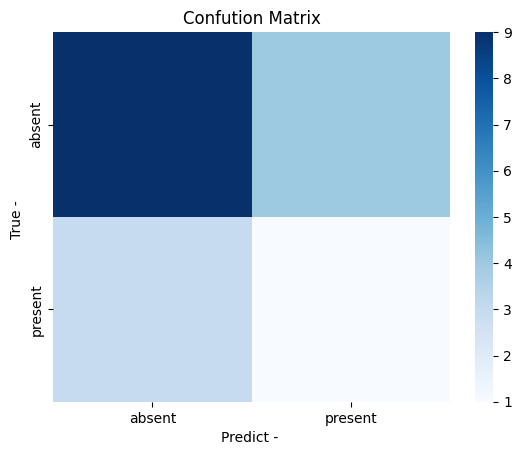

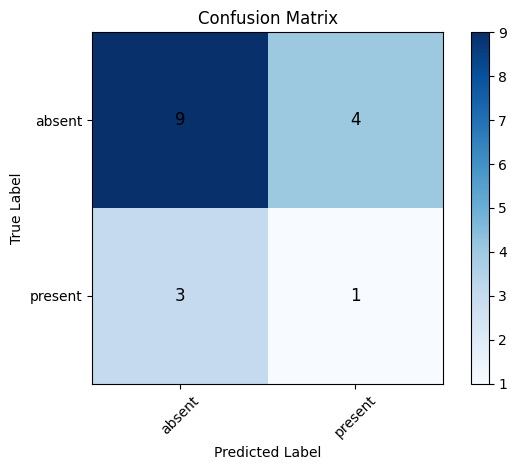

In [12]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,accuracy_score,precision_score,recall_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

def read_csv(path):
    return pd.read_csv(path)

def show_info(df):
    df.info()


df = read_csv('kyphosis.csv')
X = df.drop(columns=['Kyphosis'])
y = df['Kyphosis']
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.2, stratify=y, random_state=120)

pipeline = DecisionTreeClassifier()
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

metrics = {
    'f1_score':f1_score,
    'accuracy_score': accuracy_score,
    'precision_score': precision_score,
    'recall_score': recall_score
}

cm = confusion_matrix(y_test,y_pred)
report = classification_report(y_test,y_pred)
print(report)
fig, ax = plt.subplots()
class_names = pipeline.classes_
sns.heatmap(cm,xticklabels=class_names, yticklabels=class_names, cmap='Blues')
ax.set_title('Confution Matrix')
ax.set_xlabel('Predict - ')
ax.set_ylabel('True - ')
plt.show()
fig, ax = plt.subplots()
cax = ax.imshow(cm, interpolation='nearest', cmap='Blues')
fig.colorbar(cax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=class_names,
       yticklabels=class_names,
       xlabel='Predicted Label',
       ylabel='True Label',
       title='Confusion Matrix')

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, f'{cm[i, j]}', ha='center', va='center', color='black', fontsize=12)

# Rotate the x-axis labels for readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()
